# HW 2

`12232267  蒋夏婷`

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Significant earthquakes since 2150 B.C.
> The Significant Earthquake Database contains information on destructive earthquakes from 2150 B.C. to the present. On the top left corner, select all columns and download the entire significant earthquake data file in .tsv format by clicking the Download TSV File button. Click the variable name for more information. Read the file (e.g., earthquakes-2022-10-18_09-17-48_+0800.tsv) as an object and name it Sig_Eqs.

1.1 [5 points] Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country, and then print the top 20 countries along with the total number of deaths.

In [ ]:
data1 =pd.read_table('earthquakes-2022-10-20_21-52-40_+0800.tsv')

data1[['Country','location']] =data1['Location Name'].str.split(':',n=1, expand=True)
total_deaths_city =data1.groupby(['Country']).sum().Deaths
print('The top 20 countries along with the total number of deaths is as follow:\n',total_deaths_city.nlargest( n =20))


1.2 [10 points] Compute the total number of earthquakes with magnitude larger than 3.0 (use column Ms as the magnitude) worldwide each year, and then plot the time series. Do you observe any trend? Explain why or why not?

Text(0.5, 0, 'year')

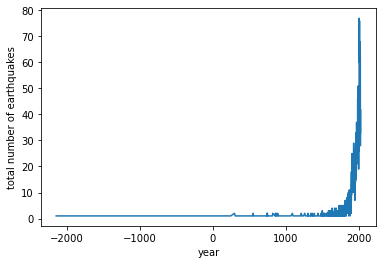

In [95]:
total_earth_mag30 =data1[data1.Mag >3.0].groupby('Year').count()
plt.plot(total_earth_mag30.index,total_earth_mag30['Location Name'])
plt.ylabel('total number of earthquakes')
plt.xlabel('year')

`There is a increasing trend of total number of the earthquakes along time, and shows a sharply upwards in recent years. This may because of the number of evidences the researchers can find, the later the richer`

1.3 [10 points] Write a function CountEq_LargestEq that returns (1) the total number of earthquakes since 2150 B.C. in a given country AND (2) date and location of the largest earthquake ever happened in this country. Apply CountEq_LargestEq to every country in the file, report your results in a descending order.

In [108]:
def CountEq_LargestEq(country,df):
    data_country =df.loc[df.Country ==country.upper(),['Year','Mo','Dy','Hr','location','Mag']]
    if data_country.Mag.isnull().all():
        return len(data_country),'',''
    else:
        max_ind =data_country.loc[data_country.Mag.idxmax()].fillna('')

        total_number_eq = len(data_country) 
        largest_date =str(max_ind['Year'])+'-'+str(max_ind['Mo'])+'-'\
                        +str(max_ind['Dy'])+'-'+str(max_ind['Hr'])
        largest_loca =max_ind['location'].lstrip()

        return total_number_eq,largest_date,largest_loca

In [110]:
CountEq_LargestEq('china',data1)
print(data1.Mag.loc[data1.Country =='SYRIAN COASTS'])

7     NaN
520   NaN
Name: Mag, dtype: float64


In [122]:
all_country =[]
countries =data1.Country.drop_duplicates(keep='first').drop(0,axis=0)
for i in countries:
    if i == i:
        num,date,loca =CountEq_LargestEq(i,data1)
        all_country.append([i,data1.Mag.max(),num,date,loca])

all_countries =pd.DataFrame(all_country, columns=['country','mag','num','date','loca']).sort_values(by ='mag',ignore_index=True)
print(all_countries.country)

0                            JORDAN
1                  BRITISH COLUMBIA
2                             KENYA
3                    ISRAEL; JORDAN
4                CALIFORNIA, MEXICO
                   ...             
339                      COSTA RICA
340    W. LUZON ISLAND, PHILIPPINES
341    E. LUZON ISLAND, PHILIPPINES
342                      BANGLADESH
343                  NORTH CAROLINA
Name: country, Length: 344, dtype: object


## 2. Air temperature in Shenzhen during the past 25 years
In this problem set, we will examine how air temperature changes in Shenzhen during the past 25 years using the hourly weather data measured at the BaoAn International Airport. The data set is from NOAA Integrated Surface Dataset. Download the file Baoan_Weather_1998_2022.csv, move the .csv file to your working directory.

Read page 10-11 (POS 88-92 and POS 93-93) of the comprehensive user guide for the detailed format of the air temperature data (use column TMP). Explain how you filter the data in your report.

**[10 points]** Plot monthly averaged air temperature against the observation time. Is there a trend in monthly averaged air temperature in the past 25 years?

In [123]:
data2 =pd.read_csv('Baoan_Weather_1998_2022.csv')

C:\Users\XuY\AppData\Local\Temp\ipykernel_15136\4071483546.py:1: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 =pd.read_csv('Baoan_Weather_1998_2022.csv')


## 3. Global collection of hurricanes
The International Best Track Archive for Climate Stewardship (IBTrACS) project is the most complete global collection of tropical cyclones available. It merges recent and historical tropical cyclone data from multiple agencies to create a unified, publicly available, best-track dataset that improves inter-agency comparisons. IBTrACS was developed collaboratively with all the World Meteorological Organization (WMO) Regional Specialized Meteorological Centres, as well as other organizations and individuals from around the world.

In this problem set, we will use all storms available in the IBTrACS record since 1842. Download the file ibtracs.ALL.list.v04r00.csv, move the .csv file to your working directory. Read Column Variable Descriptions for variables in the file. Examine the first few lines of the file.

Below we provide an example to load the file as a pandas dataframe. Think about the options being used and why, and modify when necessary.

In [3]:
import pandas as pd

In [11]:
data3 =pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17), # only choose useful columns, here we choose 0-16 columns
                 skiprows=[1, 2], # skip the rows, which will not exist in read dataset
                 parse_dates=['ISO_TIME'], # set the date form 
                 na_values=['NOT_NAMED', 'NAME']) # replace two terms into NAN
data3

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,,,,main,0,0,__________P___
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,,,,main,0,0,__________P___
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,,,,main,0,0,__________P___
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,,,,main,0,0,__________O___
4,1842298N11080,1842,1,NI,AS,NaN,1842-10-25 18:00:00,NR,10.7884,77.9194,,,,main,0,0,__________P___
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707171,2022284N16268,2022,79,NaN,GM,KARL,2022-10-12 21:00:00,TS,22.2799,-94.3074,,,,PROVISIONAL,319,319,P_____________
707172,2022284N16268,2022,79,NaN,GM,KARL,2022-10-13 00:00:00,TS,22.4000,-94.2333,,,,PROVISIONAL,331,,O_____________
707173,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 12:00:00,NR,15.2000,151.3000,,,,PROVISIONAL,1985,1974,O_____________
707174,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 15:00:00,NR,15.0500,151.3250,,,,PROVISIONAL,1974,1952,P_____________


3.1 [5 points] Group the data on Storm Identifie (SID), report names (NAME) of the 10 largest hurricanes according to wind speed (WMO_WIND).

In [26]:
data3_SID =data3.groupby('SID', as_index=False).max().sort_values('WMO_WIND', ascending=False)
print('10 largest hurricanes according to wind speed after group by storm identifie are :\n',data3_SID.NAME.head(10))

10 largest hurricanes according to wind speed after group by storm identifie are :
 11015            RHONDA
11909             TALIM
11865             PERCY
11867            INGRID
11872    ADELINE:JULIET
11877             NESAT
11887             EMILY
11888           HAITANG
11905             MAWAR
11908           KATRINA
Name: NAME, dtype: object


C:\Users\duck\AppData\Local\Temp/ipykernel_15364/1194367031.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  data3_SID =data3.groupby('SID', as_index=False).max().sort_values('WMO_WIND', ascending=False)


3.2 [5 points] Make a bar chart of the wind speed (WMO_WIND) of the 20 strongest-wind hurricanes.
> assume data processed on Q1 can be used here

<AxesSubplot:xlabel='NAME', ylabel='wimd speed'>

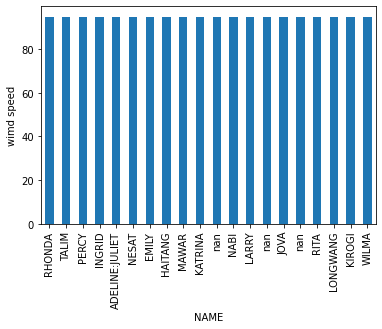

In [30]:
data3_lg20 =pd.to_numeric(data3_SID.WMO_WIND.head(20))
data3_lg20.index =data3_SID.NAME.head(20)
data3_lg20.plot.bar(ylabel ='wimd speed')

3.3 [5 points] Plot the count of all datapoints by Basin as a bar chart.

<AxesSubplot:xlabel='BASIN', ylabel='count of all datapoints'>

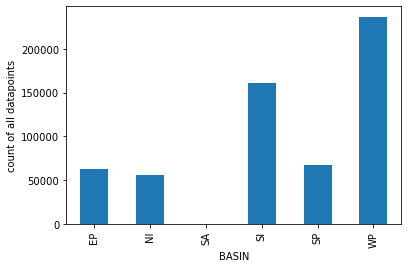

In [31]:
basin =data3.groupby('BASIN').count().SID
basin.plot.bar(ylabel ='count of all datapoints')


3.4 [5 points] Make a hexbin plot of the location of datapoints in Latitude and Longitude.

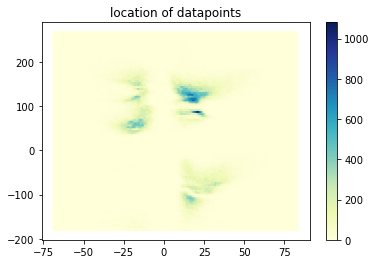

In [41]:
hb =plt.hexbin(data3.LAT, data3.LON, gridsize= 180,cmap ='YlGnBu') 
plt.colorbar(hb) 
plt.title('location of datapoints') 
plt.show() 

3.5 [5 points] Find Typhoon Mangkhut (from 2018) and plot its track as a scatter plot.

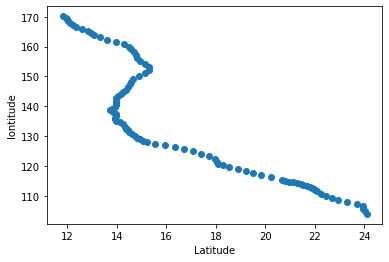

In [58]:
mangkhut =data3.loc[(data3.NAME == 'MANGKHUT') & (data3.SEASON ==2018)]
plt.scatter(mangkhut.LAT,mangkhut.LON)
plt.xlabel('Latitude')
plt.ylabel('lontitude')
plt.show()

3.6 [5 points] Create a filtered dataframe that contains only data since 1970 from the Western North Pacific (“WP”) and Eastern North Pacific (“EP”) Basin. Use this for the rest of the problem set.

In [66]:
data3_6 =data3.loc[((data3.BASIN =='WP')|(data3.BASIN =='EP'))&(data3.ISO_TIME >='1970')]
data3_6

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
350393,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,,1006,tokyo,main,1088,1088,_OO___________
350394,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,,,,main,1109,1109,_PP___________
350395,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,,1002,tokyo,main,1143,1143,_OO___________
350396,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,,,,main,1171,1168,_PP___________
350397,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,,998,tokyo,main,1182,1179,_OO___________
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707084,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 15:00:00,TS,13.99570,-90.294,,,,PROVISIONAL,0,0,P_____________
707085,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 18:00:00,NR,14.50000,-91.000,,,,PROVISIONAL,0,,O_____________
707173,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 12:00:00,NR,15.20000,151.300,,,,PROVISIONAL,1985,1974,O_____________
707174,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 15:00:00,NR,15.05000,151.325,,,,PROVISIONAL,1974,1952,P_____________


3.7 [5 points] Plot the number of datapoints per day.

C:\Users\duck\AppData\Local\Temp/ipykernel_15364/2140946348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3_6['day'] =data3_6.ISO_TIME.dt.strftime('%Y-%m-%d')


<AxesSubplot:xlabel='day'>

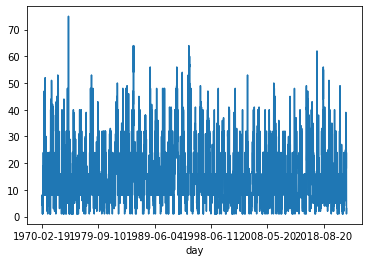

In [79]:
data3_6['day'] =data3_6.ISO_TIME.dt.strftime('%Y-%m-%d')
datapiont_day =data3_6.groupby('day').count()
datapiont_day.SID.plot()

3.8 [5 points] Calculate the climatology of datapoint counts as a function of day of year. The day of year is the sequential day number starting with day 1 on January 1st.

In [83]:
import numpy as np
def day_of_year(date):
    sum= 0
    y,m,d =date.split('-')
    
    arr = np.array([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
    if (int(y) % 4 == 0 and int(y) % 100 != 0) or int(y) % 400 == 0:
        arr[2] = 29
    else:
        arr[2] = 28
    
    for i in range(1 , int(m)) :
        sum = sum + arr[i]
    sum = sum + int(d)
    return sum

In [98]:
data3_6['day_of_year'] =data3_6.apply(lambda x: day_of_year(x.day),axis=1)

C:\Users\duck\AppData\Local\Temp/ipykernel_15364/3118200995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3_6['day_of_year'] =data3_6.apply(lambda x: day_of_year(x.day),axis=1)


3.9 [5 points] Calculate the anomaly of daily counts from the climatology.

In [111]:
day_anomaly =data3_6.groupby('day_of_year').count()
day_anomaly['anomaly'] =day_anomaly['SID']-day_anomaly.SID.mean()
day_anomaly

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG,day,anomaly
day_of_year,,,,,,,,,,,,,,,,,,,
1,83,83,83,83,83,72,83,83,83,83,83,83,83,83,83,83,83,83,-398.836066
2,72,72,72,72,72,64,72,72,72,72,72,72,72,72,72,72,72,72,-409.836066
3,74,74,74,74,74,58,74,74,74,74,74,74,74,74,74,74,74,74,-407.836066
4,93,93,93,93,93,57,93,93,93,93,93,93,93,93,93,93,93,93,-388.836066
5,105,105,105,105,105,65,105,105,105,105,105,105,105,105,105,105,105,105,-376.836066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,158,158,158,158,158,118,158,158,158,158,158,158,158,158,158,158,158,158,-323.836066
363,132,132,132,132,132,93,132,132,132,132,132,132,132,132,132,132,132,132,-349.836066
364,104,104,104,104,104,81,104,104,104,104,104,104,104,104,104,104,104,104,-377.836066


3.10 [5 points] Resample the anomaly timeseries at annual resolution and plot. So which years stand out as having anomalous hurricane activity?

<AxesSubplot:xlabel='ISO_TIME'>

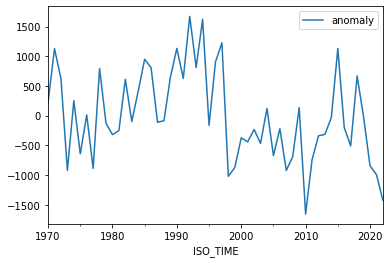

In [119]:
data3_resample =data3_6.resample('Y',on ='ISO_TIME').count()[['SID']]
data3_resample['anomaly'] =data3_resample['SID']-data3_resample.SID.mean()
data3_resample[['anomaly']].plot()

In [127]:
print('The year that stand out as having anomalous hurricane activity is:',data3_resample[['anomaly']].idxmax()[0])

The year that stand out as having anomalous hurricane activity is: 1992-12-31 00:00:00


# 4

download data from https://www.ncei.noaa.gov/access/search/data-search/global-summary-of-the-month?pageNum=2, WATTON 2 WSW, MI US(USC00208706.csv)

In [232]:
data4 =pd.read_csv('USC00208706.csv',
                    parse_dates=['DATE'],
                    index_col= 'DATE'
                    )

In [233]:
data4

,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,DP01,...,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
DATE,,,,,,,,,,,,,,,,,,,,,
2005-07-01,USC00208706,46.52664,-88.64243,424.9,"WATTON 2 WSW, MI US",NaN,NaN,49.1,",0",12.0,...,60.3,",,,0",0.0,",,,0",18.25,",0",24.70,",,,0",11.80,",,,0"
2005-08-01,USC00208706,46.52664,-88.64243,424.9,"WATTON 2 WSW, MI US",NaN,NaN,38.6,",0",9.0,...,63.5,",,,0",0.0,",,,0",17.57,",0",22.88,",,,0",12.25,",,,0"
2005-09-01,USC00208706,46.52664,-88.64243,424.9,"WATTON 2 WSW, MI US",NaN,NaN,18.9,",0",10.0,...,120.8,",,,0",0.0,",,,0",14.80,",0",21.29,",,,0",8.30,",,,0"
2005-10-01,USC00208706,46.52664,-88.64243,424.9,"WATTON 2 WSW, MI US",NaN,NaN,6.4,",0",14.0,...,141.0,",,,0",0.0,",T,,0",7.94,",0",12.79,",,,0",3.10,",,,0"
2005-11-01,USC00208706,46.52664,-88.64243,424.9,"WATTON 2 WSW, MI US",NaN,NaN,0.0,",0",22.0,...,80.8,",,,0",798.0,",,,0",-1.10,",0",3.26,",,,0",-5.46,",,,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,USC00208706,46.52664,-88.64243,424.9,"WATTON 2 WSW, MI US",11.7,NaN,11.7,",7",16.0,...,111.6,",,,7",0.0,",T,,7",12.00,",7",18.13,",,,7",5.87,",,,7"
2022-06-01,USC00208706,46.52664,-88.64243,424.9,"WATTON 2 WSW, MI US",46.7,NaN,35.0,",7",12.0,...,70.8,",,,7",0.0,",T,,7",16.50,",7",23.28,",,,7",9.72,",,,7"
2022-07-01,USC00208706,46.52664,-88.64243,424.9,"WATTON 2 WSW, MI US",NaN,NaN,NaN,NaN,11.0,...,63.5,",,,7",0.0,",T,,7",NaN,NaN,24.73,",,,7",NaN,NaN


4.2 [5 points] Plot the time series of a certain variable.

<AxesSubplot:title={'center':'the daily average minimun temperature'}, xlabel='DATE'>

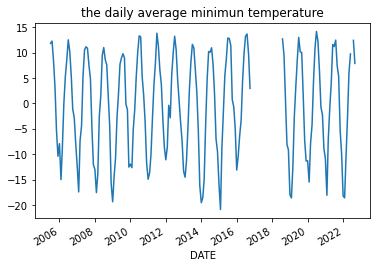

In [228]:
data4.TMIN.plot(title= 'the daily average minimun temperature')

4.3 [5 points] Conduct at least 5 simple statistical checks with the variable, and report your findings.

In [172]:
# check the basic destribution of the number of cooling days
print(data4['CLDD'].describe())

count    185.000000
mean       9.860000
std       16.944379
min        0.000000
25%        0.000000
50%        0.000000
75%       13.000000
max       81.200000
Name: CLDD, dtype: float64


In [234]:
# normalization data
data4_std =data4[['TAVG','PRCP','SNOW']].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
# calculate mouthly statistic value
month_avg =data4_std.resample('Y').mean()
month_max =data4_std.resample('Y').max()
month_min =data4_std.resample('Y').min()

The maximun annual average temperature year is: 2005 
 The minimun annual average temperature year is: 2014
The maximun annual average precipitation year is: 2022 
 The minimun annual average precipitation year is: 2006
The maximun annual average snow depth year is: 2014 
 The minimun annual average snow depth year is: 2015


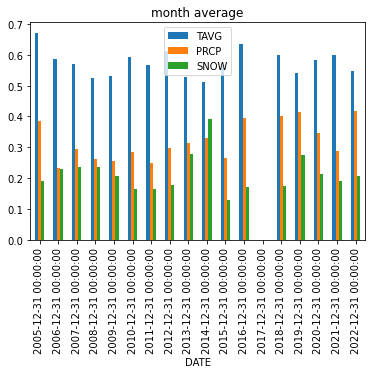

In [236]:
# plot three main variables
month_avg[['TAVG','PRCP','SNOW']].plot(title='month average', kind='bar')
# report the average, maximun and minimun of monthly data
print('The maximun annual average temperature year is:',month_avg[['TAVG']].idxmax()[0].year,'\n','The minimun annual average temperature year is:',month_avg[['TAVG']].idxmin()[0].year)
print('The maximun annual average precipitation year is:',month_avg[['PRCP']].idxmax()[0].year,'\n','The minimun annual average precipitation year is:',month_avg[['PRCP']].idxmin()[0].year)
print('The maximun annual average snow depth year is:',month_avg[['SNOW']].idxmax()[0].year,'\n','The minimun annual average snow depth year is:',month_avg[['SNOW']].idxmin()[0].year)

The maximun annual maximan year is: 2020 
 The minimun annual maximun year is: 2009


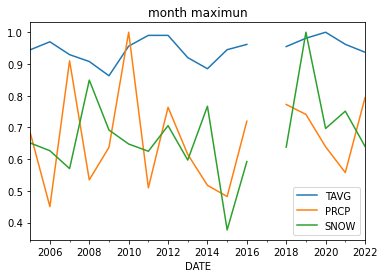

In [237]:
month_max[['TAVG','PRCP','SNOW']].plot(title='month maximun')
print('The maximun annual maximan year is:',month_max[['TAVG']].idxmax()[0].year,'\n','The minimun annual maximun year is:',month_max[['TAVG']].idxmin()[0].year)